# T1 V1
### Dimensionality Reduction Part 1

- The Input variables are nothing but the features or the dimensions of the data
- As the number of independent varialbes increases, the dimensionality of the data increases and thus,visualizaiton becomes tougher and tougher

#### Challenges of high dimensional data:
- Visualization 
- Importance of independent variables
- Computational complexity
- Model Interpretability: Model try to learn from all vaiables or even irrelevant data
- Data exploration

#### Dimensionality Reduction
- The process of reducing the number of variables from the data to ensure that the reduced data conveys maximum information.

#### Techniques of Dimensionality Reduciton - Feature Selection
- Missing Value Ratio
- Low Variance
- High Correlation
- Backward feature elimination
- Forwared Feature Selection

# T1 V2
### Dimensionality Reduction Part 2

#### Missing Value Ratio
- How to calculate missing value ration
    * Ratio of missing values = Number of missing value / Total number of observations
- Considering the fact that we have 28 independent variables which do not have any missing values and have a reasonably large number of observations
- Rule:
    * Threshold missing value ration= 0.70
    * If missing value ration <= 0.70, then : the variable can be estimated
    * If missing value ratio > 0.70, then : the variable will be dropped
- Threshold for the missing value ratio may depend on :
    * The nature of the problem
    * The size of the dataset
    * Personal preference, etc.

In [1]:
import pandas as pd

In [2]:
data = pd.read_csv('NaN_Housing_Prices.csv')

In [3]:
data.isnull().sum()

Sale_Price                                       0
No of Bedrooms                                   0
No of Bathrooms                                  0
Flat Area (in Sqft)                              0
Lot Area (in Sqft)                               0
No of Floors                                     0
No of Times Visited                          19485
Overall Grade                                    0
Area of the House from Basement (in Sqft)        0
Basement Area (in Sqft)                      13123
Age of House (in Years)                          0
Latitude                                         0
Longitude                                        0
Living Area after Renovation (in Sqft)           0
Lot Area after Renovation (in Sqft)              0
Years Since Renovation                       20695
Condition_of_the_House_Excellent                 0
Condition_of_the_House_Fair                      0
Condition_of_the_House_Good                      0
Condition_of_the_House_Okay    

In [4]:
for i in data.columns:
    tmp = data[i].isnull().sum()/len(data)
    if tmp > 0.70:
        print("Removing Column '"+i+"' with missing vlaues ration", tmp)
        data = data.drop(columns = [i])

Removing Column 'No of Times Visited' with missing vlaues ration 0.9017076218242399
Removing Column 'Years Since Renovation' with missing vlaues ration 0.9577028090147623


# T1 V3
### Dimensionality Reduction Part 3

#### Low Variance
- In predictive modelling, the values do not vary much in the the independent variables with low variance are eliminated
- e.g., Country column in the data table is no contribution to the predicctive power of our model

In [5]:
data = pd.read_csv('Raw_Housing_Prices3.csv')

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21609 entries, 0 to 21608
Data columns (total 21 columns):
ID                                           21609 non-null int64
Date House was Sold                          21609 non-null object
Sale Price                                   21609 non-null float64
No of Bedrooms                               21609 non-null int64
No of Bathrooms                              21609 non-null float64
Flat Area (in Sqft)                          21609 non-null float64
Lot Area (in Sqft)                           21609 non-null float64
No of Floors                                 21609 non-null float64
Waterfront View                              21609 non-null object
No of Times Visited                          21609 non-null object
Condition of the House                       21609 non-null object
Overall Grade                                21609 non-null int64
Area of the House from Basement (in Sqft)    21609 non-null float64
Basement Area (in

In [7]:
numerical_data = data.drop(columns = ['ID', 'Date House was Sold', 'Sale Price',
                                      'Waterfront View', 'No of Times Visited',
                                      'Condition of the House', 'Overall Grade', 'Zipcode'])
numerical_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21609 entries, 0 to 21608
Data columns (total 13 columns):
No of Bedrooms                               21609 non-null int64
No of Bathrooms                              21609 non-null float64
Flat Area (in Sqft)                          21609 non-null float64
Lot Area (in Sqft)                           21609 non-null float64
No of Floors                                 21609 non-null float64
Area of the House from Basement (in Sqft)    21609 non-null float64
Basement Area (in Sqft)                      21609 non-null int64
Age of House (in Years)                      21609 non-null int64
Renovated Year                               21609 non-null int64
Latitude                                     21609 non-null float64
Longitude                                    21609 non-null float64
Living Area after Renovation (in Sqft)       21609 non-null float64
Lot Area after Renovation (in Sqft)          21609 non-null int64
dtypes: float64(8

In [8]:
from sklearn.preprocessing import Normalizer
norm = Normalizer()
norm_data = norm.fit_transform(numerical_data)

norm_data = pd.DataFrame(norm_data, columns = numerical_data.columns)
norm_data.head()

,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),Renovated Year,Latitude,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft)
0,0.000363,0.000121,0.142628,0.682924,0.000121,0.142628,0.000000,0.007615,0.000000,0.005743,-0.014777,0.161968,0.682924
1,0.000264,0.000198,0.226174,0.637335,0.000176,0.190972,0.035202,0.005896,0.175219,0.004200,-0.010765,0.148729,0.672273
2,0.000152,0.000076,0.058440,0.758961,0.000076,0.058440,0.000000,0.006451,0.000000,0.003623,-0.009277,0.206437,0.611874
3,0.000527,0.000395,0.258159,0.658569,0.000132,0.138299,0.119859,0.006981,0.000000,0.006259,-0.016121,0.179131,0.658569
4,0.000263,0.000175,0.147072,0.707346,0.000088,0.147072,0.000000,0.002714,0.000000,0.004169,-0.010684,0.157577,0.656834


#### Why are we not using StandardScaler?
- StandardScaler changes the variance to 1
- We will not be able to compare the variance of the respective independent variables if they are equal

In [9]:
tmp = norm_data.var()
tmp

No of Bedrooms                               4.071117e-08
No of Bathrooms                              2.802492e-08
Flat Area (in Sqft)                          1.231500e-02
Lot Area (in Sqft)                           1.351803e-02
No of Floors                                 3.008524e-08
Area of the House from Basement (in Sqft)    1.010140e-02
Basement Area (in Sqft)                      1.648493e-03
Age of House (in Years)                      2.002344e-05
Renovated Year                               1.684740e-03
Latitude                                     1.077875e-05
Longitude                                    7.109191e-05
Living Area after Renovation (in Sqft)       1.079222e-02
Lot Area after Renovation (in Sqft)          1.250016e-02
dtype: float64

#### Determining the minimum threshold of the variance
- For demonstration : 1e^(-04) = 0.0001
- it can be risky as there is no good convention for what value should be choosen as for minimum threshold
- On choosign a wrong threshold value, some important information might be missed

In [10]:
T = 1e-04

for i in tmp:
    if i<T:
        norm_data.drop(columns = [tmp[tmp == i].index[0]], inplace = True)
norm_data.var()

Flat Area (in Sqft)                          0.012315
Lot Area (in Sqft)                           0.013518
Area of the House from Basement (in Sqft)    0.010101
Basement Area (in Sqft)                      0.001648
Renovated Year                               0.001685
Living Area after Renovation (in Sqft)       0.010792
Lot Area after Renovation (in Sqft)          0.012500
dtype: float64

#### Eliminating Categorical Variables
- Use the value counts function
- Look at the frequency of distinct categories
- frequency if very high frequency (>95%), eliminate the variable

#### Elimination of independent variables with high correlation:
- On the basis of high correlation
    * Not a reliabel techinique as it only looks ate one to one correlation
- Variance Inflation Factore (VIF)
    * A reliabel techinique as it looks at things at an aggregate level

# T2 V1
### Advanced Dimensionality Reduction Part 1

#### Feature Selection:
- Drawbacks:
    * Very Subjective creiteria for dimensionality reduction which can be a source of confusion
    * Lead to poor model performance due to accidentally eliminating some important features


#### Advanced and mature dimensionality reduction techniques:
- Forward selection of features
- Backward elimination of features

Note: To under these proceses, an evaluation metric is requried

###### An evaluation metric governs whether any given feature should be selected in the final model or not

#### R^2:
- it does not consider the number of input variables in the model
- The values keep on marginally increasing even if the newly added feature has zero to minimal importance

#### Adjusted R^2:
- it consider the number ofinput features being fed to the predictive model
- Adding extra features with no significant effect on the dependent variable can reduce the model performance i.e. adj - R^2

- Adjusted R^2 = 1- ((n-1) / [n-(k+1)]) (1- R^2)
- Where:
    * n represents the sample size or total number of observations
    * k represents the number of input variables in our regression model
    * R^2 represents the simple R^2 score
#    
- When k = 0, the value of the fraction becomes 1
    * Adjusted R^2 = R^2
#         

- Relation:
    * Case 1 : The new feeature added contributes significantly to model performance
    * Case 2 : The new feature added does not contribute significantly to model performance

Case 1:
    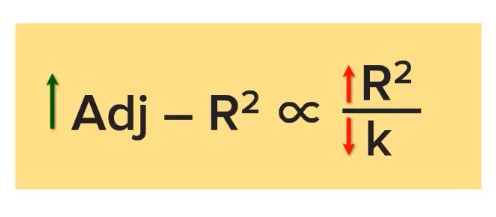

Case 2: 
    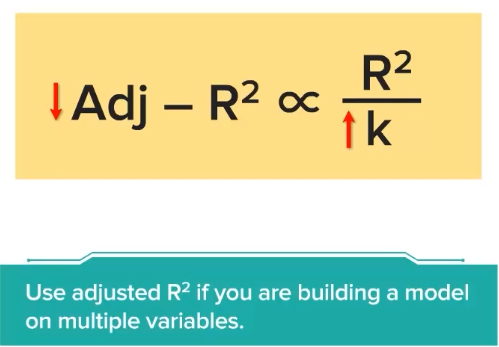

#### Forward selection:

In [25]:
data = pd.read_csv("C:/Users/0526p/Jupyter/intershala ml training/ML M5/Transformed_Housing_Data2.csv")

In [29]:
x = data.drop(columns = ['Sale_Price'])
y = data['Sale_Price']

In [30]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 101)

x_train.shape, x_test.shape, y_train.shape, y_test.shape

((15126, 30), (6483, 30), (15126,), (6483,))

In [31]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression(normalize = True)
lr.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

In [34]:
predictions = lr.predict(x_test)
lr.score(x_test, y_test)

0.8462355542468779

In [37]:
from sklearn.metrics import r2_score
def adj_r2(data_x, data_y, predictions):
    '''
    m : number of independent variabels
    data_y : target variable
    predictions : prediction of the model to be evaluated
    
    Returns : Adjusted R^2
    '''
    
    R = r2_score(data_y, predictions)
    n = len(data_y)
    m = len(data_x.columns)
    adj_R = 1 - ((1-R)*(n-1))/(n-m-1)
    return adj_R

In [48]:
print(adj_r2(x_test, y_test, predictions))

0.8455205924718324


##### "Adjusted R^2 < R^2 \nThere are some features, which are not adding values to the final model"

# T2 V2

### Advanced dimensionality Reduction Part 2

#### Inplement Forward Selection techinque
- Step 1 : For every independent variable, build a linear regression model individually. Choose the ndependent variable with the highest adj - R^2 score and call it Var 1.
- Step 2 : Repeat the above process by using the Var1 as the base independent variable and combining it with every other independent variable to build a regression model. Choose the combination with highest adj - R^2 score
- Step 3 : Repeat the above process until the maximum number of features has been obtained or the adj - R^2 score is no longer increasing

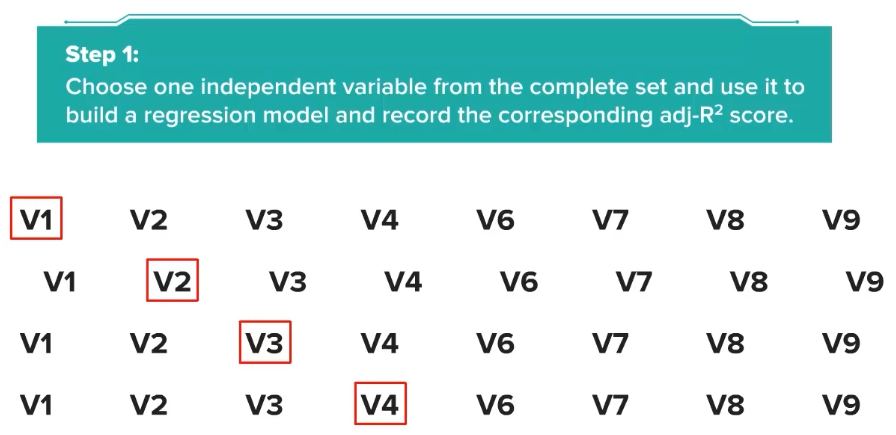

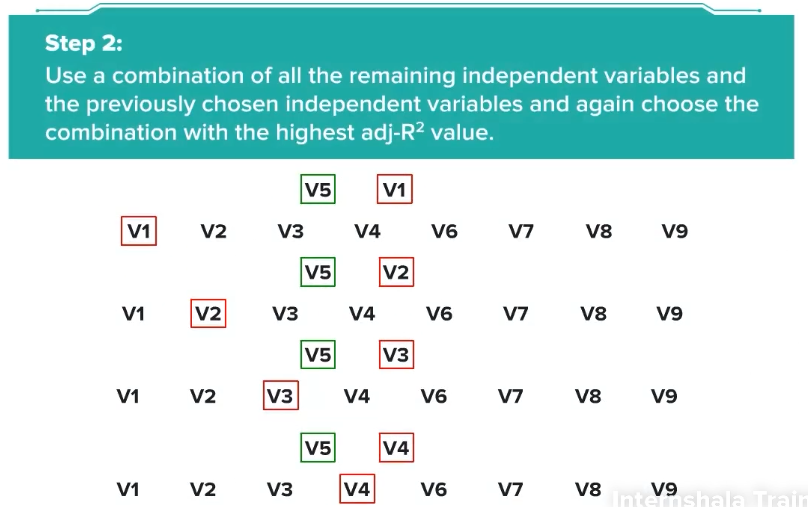

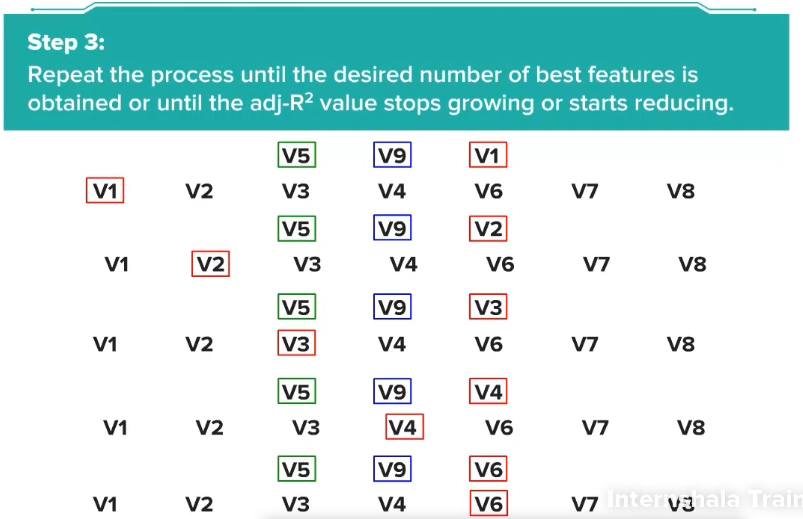

In [49]:
def return_r2(X, Y, model):
    '''
    X : independent variables
    Y : target variable
    model : predictive model
    
    Returns : Adjusted R^2 corresponding to the model
    '''
    
    model.fit(X, Y)
    pred = model.predict(X)
    m = len(X.columns)
    r2 = adj_r2(m, Y, pred)
    return r2

In [50]:
def forward_selection(model, X, Y, max_features):
    '''
    X: independent variables
    Y: target variable
    model: predictive model
    max_features: selects best feature upto max-features value
    
    Returns:
    Rmax : Adjusted R2 of the final model
    history: list of Rmax at every new independent variable added to the model
    x[f_col]: best features upto max_features
    '''
    f_col = []
    history = []
    for i in range(max_features):
        f_col.append('blank')
        tmp = f_col[:]
        Rmax = -1
        for var in X.columns:
            tmp[-1] = var
            r2 = return_r2(X[tmp], Y, model)
            if r2 >= Rmax:
                Rmax = r2
                f_col[-1] = var
                elim = var
        print('Selected', f_col[-1], 'with new r2 = ', Rmax)
        history.append(Rmax)
    return Rmax, history, X[f_col]

In [53]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression(normalize = True)

score, history, sel_data = forward_selection(lr, x_train, y_train, 5)

AttributeError: 'int' object has no attribute 'columns'

# T2 V3

### Advanced dimensionality Reduction Part 3

#### Implementation Backward Elimination is used to:
- Remove the redundant variables from the model
- Remove a balance between the model performance and model slmplicity

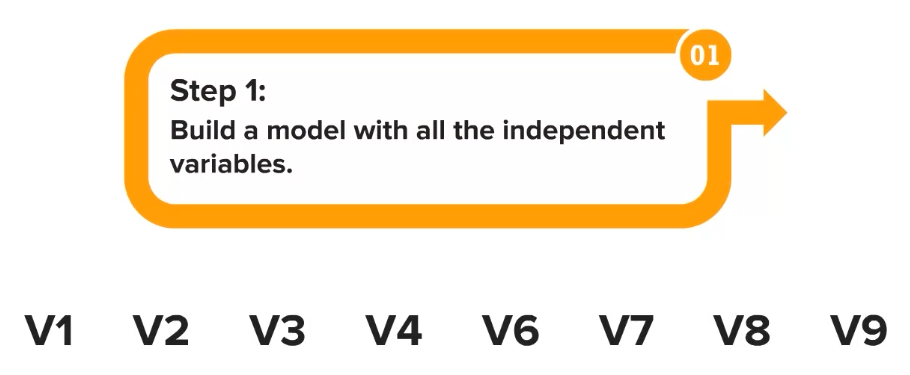

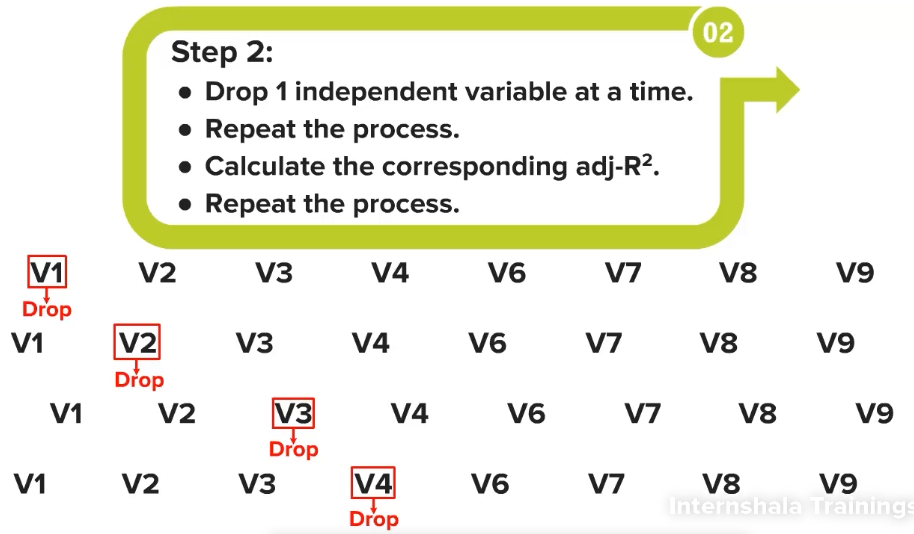

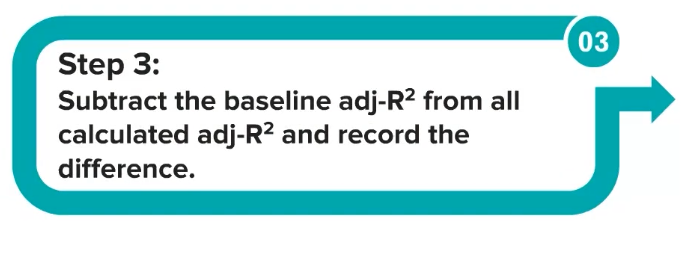

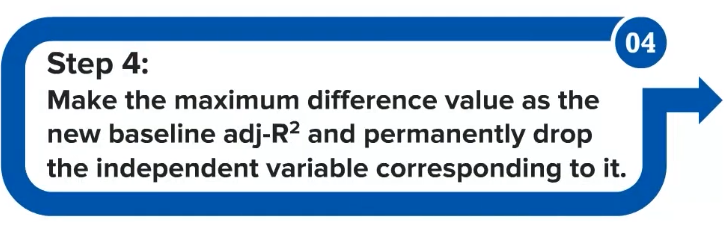

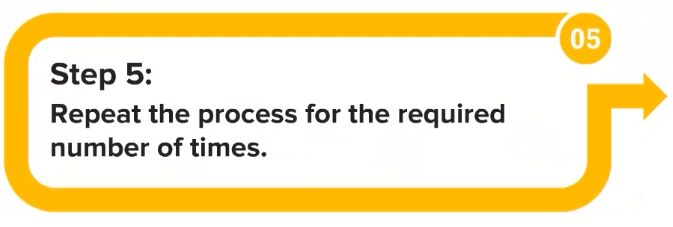

#### What range of values can the diffence between the calculated and the baseline adj- R^2 take? And which one is more favorable?
- Case 1 : Calculated adj-R^2 - baseline adj-R^2 > 0
    * Dropping that corresponding variable actually improved the model
    
- Case 2 : Calculated adj-R^2 - baseline adj-R^2 < 0
    * The removal of the independent variable decreases the model performance - A good point to stop the backward elimination

In [56]:
def backward_elimination(model, X, Y, min_features):
    '''
    X : independent variables
    Y : target variable
    model : predictive model
    min_features : eliminate worst features until only min_features are left
    
    Returns:
    Rmax : Adjusted R2 of the final model
    history : list of Rmax at every new independent variable added to the model
    x[f_col] : best features upto max_features
    '''
    
    elim_data = X[:]
    r2_history = []
    base_r2 = return_r2(elim_data, Y, model)
    print('base_r2 is ', base_r2)
    for i in range(X.shape[1] - min_features):
        difference = -100
        
        for var in elim_data.columns:
            tmp = elim_data.drop(columns = [var])
            r2 = return_r2(tmp, Y, model)
            if (r2 - base_r2) > difference:
                difference = r2 - base_r2
                eliminate = var
                new_r2 = r2
        elim_data.drop(columns = [eliminate], inplace = True)
        r2_history.append(new_r2)
        print(eliminate, 'Eliminated: New adj_r2 - ', new_r2)
        base_r2 = new_r2
    return base_r2, r2_history, elim_data

In [58]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression(normalize = True)

score, history, survived_data = backward_elimination(lr, x_train, y_train, 15)

AttributeError: 'int' object has no attribute 'columns'

#### Is there a better way to decide how many features we should keep in our model?
- Plot the adj-R^2 score corresponding to every interation

In [59]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression(normalize = True)

score, history, survived_data = backward_elimination(lr, x_train, y_train, 1)

AttributeError: 'int' object has no attribute 'columns'

In [60]:
plt.figure(figsize = (5, 5), dpi = 150)
plt.plot(range(len(history), 0, -1), history, color = 'red')
plt.xlabel('remaining features')
plt.ylabel('adj-R2 Score')
# plt.yticks([z/100 for z in range()])
plt.title('Backward Elimination')

NameError: name 'plt' is not defined

Note: To maximize the performance of the model and remove only the insignificant variable without harming the adj-R^2 score

- Why do we need to methods - forward selection and backward elimination - that do almost the same thing?
    * Adj-R^2 score is a powerful technique, but it is computationally expensive

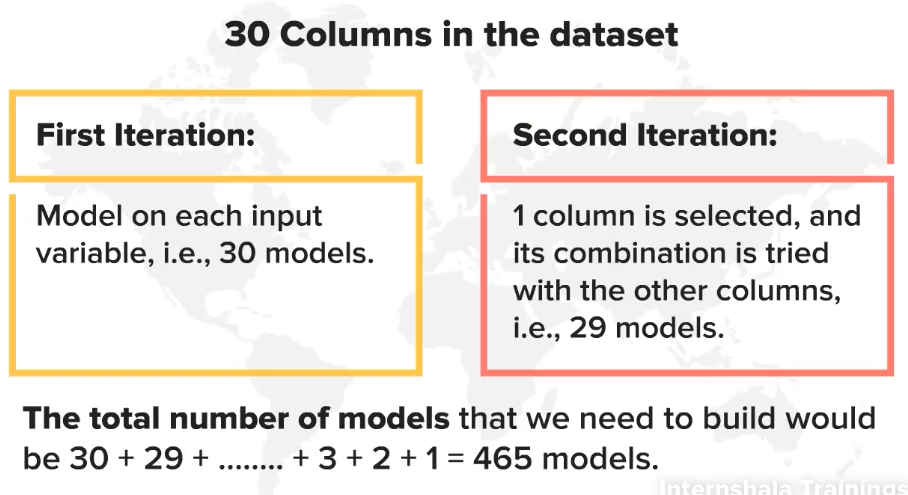

- For huge data, backward feature elimination of forward feature selection are time consuming techniques
- Do you want to have model interpretation as priority and only select a small subset of best features and interpret the model?
    * The forward selection is preferred as it focuses on choosing the best one first
- Do you want to strictly remove the features which negligibly add to the model performance?
    * The backward selection tends to work better as it focuses on removing the redundant columns first

- Both the techniques can be programmed in a way that the program would auto stop when:
    * The icrement in adjusted R Square < A certain threshold